## Import Packages

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import gensim
from nltk.tokenize import word_tokenize

## Loading data

In [3]:
df = pd.read_csv('/kaggle/input/feedback-prize-english-language-learning/train.csv')
#df['split'] = np.random.randn(df.shape[0], 1)

#msk = np.random.rand(len(df)) <= 0.8  ## split the data set with 0.8

#train = df[msk] ## set train set
#test = df[~msk]  ## set test set

train = df
test_extend = pd.read_csv('/kaggle/input/580data/test.csv') ## read the test data with add some books and writing of other esl students

In [3]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
text_list = []
for i in train.full_text:
    j = word_tokenize(i)
    text_list.append(j)

In [5]:
len(text_list)

3911

In [6]:
model = gensim.models.Word2Vec(text_list, vector_size=1000, window=10,min_count=1)
#model.wv.key_to_index

In [7]:
vector_dict = {}
for word in model.wv.index_to_key: 
    vector_dict[word] = model.wv.get_vector(word)

vec_df = pd.DataFrame(vector_dict).T
vec_df = vec_df.iloc[1:, :]
vec_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
.,-0.237104,-0.415981,0.495736,-0.874963,0.447117,-0.312203,0.008369,-0.355469,0.135459,-0.289454,...,-0.104962,-0.011320,0.349567,0.012549,-0.430032,-0.168729,-0.252548,0.101014,0.300243,0.444838
",",-0.309825,0.014792,-0.263529,0.151401,0.160201,0.115105,0.244040,-0.447072,0.216512,0.159751,...,0.368527,0.308692,0.125918,0.210441,0.219378,-0.038008,0.218455,0.013058,-0.065456,0.117599
the,-0.202914,0.157962,-0.654919,0.182953,0.185347,-0.199320,-0.093715,-0.216830,0.554579,0.324659,...,0.213867,-0.140825,-0.594193,-0.307156,-0.011224,0.309148,-0.415796,0.139929,0.248035,-0.045083
and,-0.558495,-0.384453,-0.212503,-0.339623,0.230263,-0.148148,0.280100,-0.288854,0.389455,0.252940,...,0.315652,-0.424765,-0.020619,-0.068194,-0.186779,-0.082217,0.228500,0.003892,0.020199,-0.262632
you,0.034619,-0.763474,1.165745,0.293997,1.033487,-1.468145,-0.441009,-1.070685,-0.556536,0.754673,...,-0.656247,-0.279803,1.150313,1.445689,-0.292662,0.847608,0.631845,-0.916025,-0.235293,-0.372185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
undertan,0.005960,0.001814,0.006752,-0.005973,-0.000130,0.001032,0.002324,-0.001122,-0.005470,-0.005523,...,0.005531,-0.002671,0.002856,0.003846,-0.000382,-0.005308,-0.003681,0.001097,0.002431,0.000731
Latinos,0.011433,0.002881,-0.000873,0.004952,0.002850,-0.002157,-0.002075,0.004199,-0.010325,-0.010756,...,0.002298,0.001946,0.004018,-0.005998,0.006162,0.002734,-0.011832,-0.009657,-0.011425,0.001896
doble,0.003343,0.004900,0.012121,0.005257,-0.003047,-0.004364,0.000589,0.005402,-0.001275,0.005699,...,-0.004920,-0.000363,0.003536,0.000854,0.008863,-0.000209,-0.005637,-0.004480,0.008648,0.003292
neutral,-0.002868,0.010690,0.004513,-0.021257,-0.010328,-0.006932,-0.002995,0.000894,-0.000987,-0.007611,...,-0.007611,-0.007717,0.008827,0.008621,-0.009957,-0.008780,-0.001412,-0.009020,-0.012033,0.013885


### K-Fold

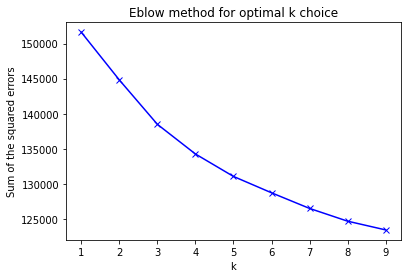

In [8]:
dict = []
# Try k for different values
##find the best k value
r = range(1, 10)
for k in r:
    #print(k)
    k_means = KMeans(n_clusters=k)
    kmean_model = k_means.fit(vec_df)
    dict.append(k_means.inertia_)
plt.plot(r, dict, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of the squared errors')
plt.title('Eblow method for optimal k choice')
plt.show()

## Train data Preprocessing

In [4]:
vocabulary_size = 3200
use_k_fold = True
target_columns = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]

In [5]:
train["text"] = train["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
#test["text"] = test["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
test_extend["text"] = test_extend["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
vectorizor = keras.layers.TextVectorization(
    max_tokens=vocabulary_size, 
    output_mode="tf-idf", 
    ngrams=2
)
#vectorizor.adapt(list(train["text"]) + list(test["text"]))
vectorizor.adapt(list(train["text"]) + list(test_extend["text"]))

2022-11-29 22:04:07.301237: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-29 22:04:07.583216: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


## Building Model

In [6]:
lr=0.1
batch_size=32
embedding_space_dim=200
epochs=40

In [7]:
import keras
from tensorflow.keras import optimizers
def build_model():
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(), dtype="string"))
    model.add(vectorizor)
    #model.add(keras.layers.Dense(128, activation='swish'))
    model.add(keras.layers.Dense(64, activation='softmax'))  ## change the layer dense to 32
    model.add(keras.layers.Dense(32, activation='softmax'))
    #model.add(keras.layers.Dense(16, activation='swish'))
    model.add(keras.layers.Dense(6))
    #model.add(keras.layers.Dropout(0.05))
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    return model

In [8]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 3200)              1         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 207,143
Trainable params: 207,142
Non-trainable params: 1
_________________________________________________________________


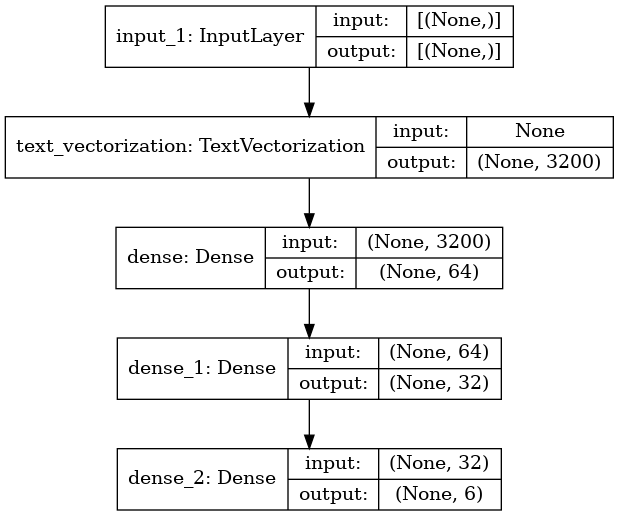

In [9]:
from tensorflow.keras.utils import plot_model
#keras.utils.plot_model(model, show_shapes=True)
plot_model(model, show_shapes=True)

## Training models

In [10]:
keras.backend.clear_session()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) ## as the k means cluster results, we choose n_splits = 5
models = []
all_rmse_history = []
for i, (train_set, val_set) in enumerate(kfold.split(train)):
    x_train = train.iloc[train_set]["text"]
    y_train = train.iloc[train_set][target_columns]
    x_val = train.iloc[val_set]["text"]
    y_val = train.iloc[val_set][target_columns]
    model = build_model()
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    early_stop = keras.callbacks.EarlyStopping(monitor="val_rmse", mode="min", patience=5)
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_val, y_val),callbacks=[early_stop])
    result = model.evaluate(x_val, y_val)
    print("Loss:", result[0], "RMSE:", result[1])
    all_rmse_history.append(result[1])
    models.append(model) 
    if not use_k_fold:
        break
print(f"Mean RMSE:{np.mean(all_rmse_history)}")

Epoch 1/40
98/98 [==============================] - 2s 16ms/step - loss: 9.3660 - rmse: 3.0604 - val_loss: 8.6920 - val_rmse: 2.9482
Epoch 2/40
98/98 [==============================] - 1s 13ms/step - loss: 8.1752 - rmse: 2.8592 - val_loss: 7.5613 - val_rmse: 2.7498
Epoch 3/40
98/98 [==============================] - 1s 13ms/step - loss: 7.0831 - rmse: 2.6614 - val_loss: 6.5113 - val_rmse: 2.5517
Epoch 4/40
98/98 [==============================] - 1s 13ms/step - loss: 6.0638 - rmse: 2.4625 - val_loss: 5.5331 - val_rmse: 2.3523
Epoch 5/40
98/98 [==============================] - 1s 12ms/step - loss: 5.1205 - rmse: 2.2628 - val_loss: 4.6354 - val_rmse: 2.1530
Epoch 6/40
98/98 [==============================] - 1s 12ms/step - loss: 4.2649 - rmse: 2.0652 - val_loss: 3.8304 - val_rmse: 1.9571
Epoch 7/40
98/98 [==============================] - 1s 13ms/step - loss: 3.5054 - rmse: 1.8723 - val_loss: 3.1224 - val_rmse: 1.7670
Epoch 8/40
98/98 [==============================] - 1s 13ms/step - lo

## Predict for Test dataset

In [ ]:
"""
preds = []
for model in models:
    preds.append(model.predict(test["text"]))
pred = np.mean(preds, axis=0)
output = pd.DataFrame({
    "text_id": test["text_id"]
})
#print(output)
for i in range(len(target_columns)):
    column = target_columns[i]
    #print(column)
    output[column] = pred[:,i]
pred = np.mean(preds, axis=0)
output.to_csv("output.csv", index=False)
"""

In [ ]:
#test

In [ ]:
#output

### Test for test set with students and famous book

In [11]:
pred1 = []
for model in models:
    pred1.append(model.predict(test_extend["text"]))
predict = np.mean(pred1, axis=0)
output_test = pd.DataFrame({
    "text_id": test_extend["text_id"]
})
for i in range(len(target_columns)):
    columns = target_columns[i]
    #print(column)
    output_test[columns] = predict[:,i]
predict = np.mean(pred1, axis=0)
output_test.to_csv("output_test.csv", index=False)


In [12]:
output_test

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.170754,3.059791,3.266031,3.159034,3.099517,3.123996
1,000BAD50D026,2.515758,2.466123,2.650434,2.497699,2.415305,2.492382
2,00367BB2546B,3.338218,3.228927,3.430204,3.337766,3.258210,3.290874
3,hp,2.673093,2.615654,2.788807,2.649591,2.589343,2.648179
4,tkm,2.673210,2.615768,2.788907,2.649698,2.589478,2.648294
5,high school,2.791923,2.734911,2.903773,2.774080,2.705093,2.766965
6,college1,2.515806,2.466168,2.650478,2.497747,2.415357,2.492429
7,college2,3.170974,3.075176,3.273576,3.165878,3.096127,3.125471
